In [40]:
import pandas as pd
import numpy as np
import xarray as xr   

import matplotlib.pyplot as plt  

from bluemath_tk.datamining.lhs import LHS
from bluemath_tk.datamining.mda import MDA

#### Latin HyperCube Sampling

In [41]:
dimensions_names = ['hs', 'hs_l0', 'swl']
lower_bounds = [0, 0.005, -1]
upper_bounds = [6,  0.05,  2]
num_samples = 10000
lhs_object = LHS(num_dimensions=len(dimensions_names), seed=1)
lhs_df = lhs_object.generate(dimensions_names=dimensions_names, lower_bounds=lower_bounds, upper_bounds=upper_bounds, num_samples=num_samples)

#### MDA

In [42]:
n_centers=100
mda_object = MDA(num_centers=n_centers)
data = lhs_df
mda_object.fit(data=data,first_centroid_seed=0, normalize_data=True)
mda_df = mda_object.centroids

In [43]:
mda_df['tp'] =  np.sqrt((mda_df["hs"].values * 2 * np.pi) / (9.806 * mda_df["hs_l0"]))
lhs_df['tp'] =  np.sqrt((lhs_df["hs"].values * 2 * np.pi) / (9.806 * lhs_df["hs_l0"]))

#### Outpus

In [44]:
mda_df.to_csv('outputs/mda_df.csv',index=False)
lhs_df.to_csv('outputs/lhs_df.csv',index=False)

#### Plot

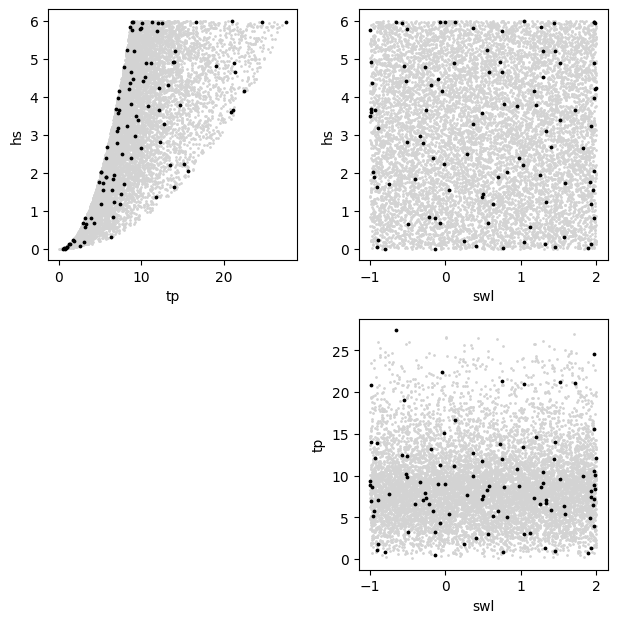

In [47]:
n_vars = len(dimensions_names)
vars_to_plot = ['hs','tp','swl']

fig, axes = plt.subplots(n_vars,n_vars,figsize=(n_vars*3,n_vars*3))

for i in range(n_vars):
    for j in range(n_vars):

        if j <= i:
            axes[i,j].set_visible(False)
        else:
            axes[i,j].scatter(lhs_df[vars_to_plot[j]],lhs_df[vars_to_plot[i]], color='lightgray',s=1)
            axes[i,j].scatter(mda_df[vars_to_plot[j]],mda_df[vars_to_plot[i]], color='k',        s=3)
            axes[i,j].set_xlabel(vars_to_plot[j])
            axes[i,j].set_ylabel(vars_to_plot[i])

plt.tight_layout()
plt.show()        
